45.0


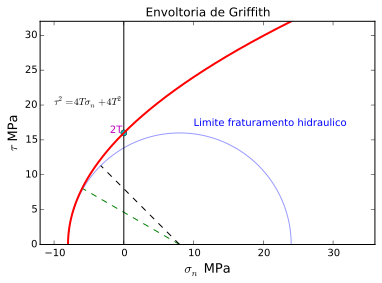

In [37]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
# Using the magic encoding
# -*- coding: utf-8 -*-


T0 = -8 ## T0 negativo, campo tensional
tau=[]
i=0
sigma_n=np.arange(T0,abs(4*T0),0.0001) 

s = (3*abs(T0) + T0) / 2.           # mean stress
raio = (3*abs(T0) + abs(T0)) / 2.   # raio do círculo de Mohr

dois_alfa=0.5*(np.arccos((3*abs(T0)-abs(T0))/(3*abs(T0)+abs(T0)))) # angulo radianos entre sigma1 
                                                                   # e o maior eixo da elipse de fratura

s_f = s + (raio * np.cos(2 * np.pi / 2.4) ) # fratura com 15º em relação a \sigma_1
t_f = (raio * np.sin(2 * np.pi / 2.4) )

s_t = s + (raio * np.cos(np.pi-dois_alfa) ) # fratura com 22.5º em relação a \sigma_1
t_t = (raio * np.sin(np.pi-dois_alfa) )

print (dois_alfa*180/np.pi) # angulo em graus

while i<len(sigma_n):
    #4*T0*sigma_n[i]+4*T0**2 Envoltória de Griffith em termos de cisalhamento normal e 
    #resistência à tração uniaxial T
    tau.append(np.sqrt(abs(4*T0)*sigma_n[i]+4*T0**2))
    i+=1

plt.fig = plt.figure()

plt.plot([s, s_f], [0, t_f], 'g--') # Ruptura
plt.plot([s, s_t], [0, t_t], 'k--') # Ruptura

plt.fig.gca().add_artist( plt.Circle( (s, 0), raio, fill=False, color='b', alpha=0.4) )

plt.plot([0,0], [0, 4*abs(T0)], 'k') #Eixo y 
plt.plot(0,2*abs(T0), 'co') # ponto onde \sigma_1 é zero, \tau= 2T
plt.text(0-abs(T0/4),2*abs(T0), '2T', color ='m',fontsize=10)

plt.plot(sigma_n,tau,'r',linewidth=2) # Envoltória de ruptura

plt.title('Envoltoria de Griffith')
plt.xlabel(r'$\sigma_n$ MPa',fontsize=13)
plt.ylabel(r'$\tau$ MPa',fontsize=13)
plt.text(T0-2,2.5*abs(T0),r'$\tau^{2} = 4T\sigma_n + 4T^{2}$')
plt.text(10,17, 'Limite fraturamento hidraulico', color ='b', fontsize=10)
plt.axis('equal')
plt.xlim((T0,4*abs(T0)))
plt.ylim((0,4*abs(T0)))
plt.show()

Com o gráfico anterior é possível extrair alguns dados interessantes:
- A envoltória de ruptura é uma parábola, distinta daquela envoltória de Mohr-Coulomb;
- As fraturas / falhas geradas (linha pontinlhada verde) encontram-se a um ângulo máximo de 2$\pi /$ 2.4 = 15$^{\circ}$ com $\sigma_1$; no caso de $\sigma_1$ vertical. implica que as fraturas / falhas tem um mergulho mínimo de 75$^{\circ}$
- Para a parte tensional do envelope de ruptura, a fratura com orientação mais favorável a ativação é aquela  perpendicular a T( ou $\sigma_3$).

##Fraturas de Tensão

img src="Griffith/falha_normal.jpg">

Considerando-se o critério de Griffith para falhamento em condições tracionais

se $\sigma_1 <  -3\sigma_3$ então $\sigma_3 = -T_0$

e 

$\sigma_1-\sigma_3 <  4T_0$

Usando

$\sigma_1= \rho_rgd$

pode ser demonstrado que a profundidade máxima que uma fratura tensional pode alcançar ($d_{max}$) antes de se transformar em uma falha normal é:

\begin{equation}
d_{max} = \frac{3T_0}{\rho_rg}
\end{equation}

onde $\rho_r$ é a densidade média da rocha na profundidade $d_{max}$ e $g$ é a aceleração devida a gravidade.

A resistência à tração uniaxial média para rochas é de cerca de 3MPa e a maioria das rochas em condições de crosta superior tem uma densidade de 2100-2500 $kgm^{-3}$; com g=9.81 $ms^{-2}$. No exemplo da envoltória desenhada acima, com resistencia a tensão de 8 MPa e densidade de 2200 $kgm^{-3}$ temos

In [36]:
T0=8000000 # 8MPa
rho=2200 # densidade da rocha; densidade de carbonatos Araripe; valores médios entre 2100-2500 kgm-3
g=9.81 #gravidade
dmax=3*T0/(rho*g) #Gudmundsson (2011), pg 237
print('Para uma rocha com resistencia a tensao de',T0/1000000.,'MPa e densidade de ',rho,'kgm-3, a profundidade maxima de fraturas tensionais e de ',dmax,'m' )

('Para uma rocha com resistencia a tensao de, ', 8.0, 'MPa e densidade de ', 2200, 'kgm-3, a profundidade maxima de fraturas tensionais e de ', 1112.0378092855158, 'm')


Profundidade máxima de fraturamento hidráulico

$\sigma_v = \rho_rgz$

$P_f=\rho_fgz$

$\sigma'_v = \sigma_v - P_f$

Fator de pressão de fluidos $\lambda_v = \frac{P_f}{\sigma_v} = \frac{P_f}{\rho_rgz}$

Em regime de falhamento normal

$\sigma'_1 = \sigma'_v = \rho_rgz - \rho_rgz\lambda_v = (1-\lambda_v)\rho_rgz$

Como $\sigma_1 <  -3\sigma_3$ então $\sigma_3 = -T_0$ (critério de Griffith para falhamento em condições tracionais) temos

\begin{equation}
z= \frac{3T_0}{(1-\lambda_v)\rho_rg}
\end{equation}

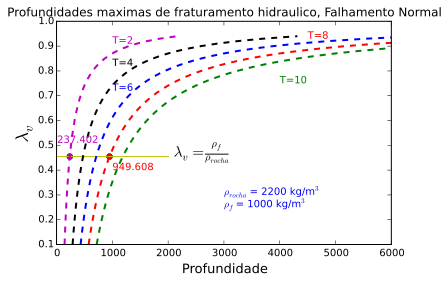

In [85]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt

T0 = 8
rho = 2.2
g = 9.81
h=[]
k=[]
l=[]
m=[]
z =[]
i = 0
lambda_flu = np.arange(0.1,0.95,0.01)
dmax = 3*T0/rho*g
lambda_=1/rho  #\lambda_v, fluido = água
#fig = figure()

while i < len(lambda_flu):
    h.append(3*2/(1-lambda_flu[i])*rho*g) #3*T0/(1-lambda_flu[i])*rho*g), T0=2
    k.append(3*4/(1-lambda_flu[i])*rho*g) #3*T0/(1-lambda_flu[i])*rho*g), T0=4
    l.append(3*6/(1-lambda_flu[i])*rho*g) #3*T0/(1-lambda_flu[i])*rho*g), T0=6
    m.append(3*8/(1-lambda_flu[i])*rho*g) #3*T0/(1-lambda_flu[i])*rho*g), T0=8
    z.append(3*10/(1-lambda_flu[i])*rho*g) #3*T0/(1-lambda_flu[i])*rho*g), T0=10
    i+=1

#textos no gráfico
plt.text(1000,0.91, 'T=2', color ='m',fontsize=10)
plt.text(1000,0.82, 'T=4', color ='k', fontsize=10)
plt.text(1000,0.72, 'T=6', color ='b', fontsize=10)
plt.text(4500,0.93, 'T=8', color ='r', fontsize=10)
plt.text(4000,0.75, 'T=10', color ='g', fontsize=10)
plt.text(3000,0.3, r'$\rho_{rocha}$ = 2200 kg/m$^3$', color ='b',fontsize=10)
plt.text(3000,0.25, r'$\rho_{f}$ = 1000 kg/m$^3$', color ='b',fontsize=10)
plt.text(2100,lambda_,r'$\lambda_v =\frac{\rho_f}{\rho_{rocha}}$', color ='k',fontsize=15)
#
plt.xlabel('Profundidade',fontsize=13)
plt.ylabel(r'$\lambda_v$',fontsize=18)
#
plt.plot(3*8/(1-lambda_)*rho*g,lambda_, 'ro') #
plt.text(1000,0.4,str(3*8/(1-lambda_)*rho*g),color ='r')
plt.plot(3*2/(1-lambda_)*rho*g,lambda_, 'mo') #
plt.text(10,0.51,str(3*2/(1-lambda_)*rho*g),color ='m')
plt.plot([0,2000], [lambda_,lambda_],'y', linewidth=1) # \lambda_v, fluido= água
plt.plot(h,lambda_flu,'m--',linewidth=2)# T=2
plt.plot(k,lambda_flu,'k--',linewidth=2)# T=4
plt.plot(l,lambda_flu,'b--',linewidth=2)# T=6
plt.plot(m,lambda_flu,'r--',linewidth=2)# T=8
plt.plot(z,lambda_flu,'g--',linewidth=2)# T=10
plt.title('Profundidades maximas de fraturamento hidraulico, Falhamento Normal')
plt.xlim((0,6000))
plt.legend()
plt.show()

No gráfico acima a linha amarela corresponde a profundidade máxima de ocorrencia de fraturas hidráulicas para um fluido interporos compreendendo apenas água. Os círculos magenta e vermelho indicam as profundidades máximas (em metros) correspondentes para as rochas de densidade 2200 kg\m$^3$ com resistencia a tração de 2 e 8 MPa, respectivamente (237 e 950 m).

A profundidade máxima para a imposição deste tipo de fraturas tensionais é diretamente proporcional a resistencia a tensão da rocha.

Fyfe et al (1978) apontam as seguintes conclusões:

- Fluidos naturais nas rochas próximas a superfície mostram enorme influencia (input) da hidrosfera
- a maioria dos fluidos em todas as rochas mostram amplas concentrações de sal
- CO$_2$ tende a aumentar com aumento da temperatura
- o conteúdo total de minerais dissolvidos aumenta com aumento da temperatura
- as concentrações de elementos menores (formadores de mineralizações) é geralmente da ordem de ppm ou menor
- taxas de elementos formadores de minerais (Na,K,Mg,Ca, etc.) são altamente variáveis nos limites de P-T observados e em diferentes condições geológicas.


<font color='green'>Fyfe, W.S. ; Price, N.J. e Thompson, A.B. (1978) Fluids in the earth's crust: their significance in metamorphic, tectonic, and chemical transport processes, Developments in geochemistry,Elsevier Scientific Pub. Co., 387 p.</font>
